***
Characteristics of this dataset: This dataset includes comprehensive water quality metrics from various locations. The data are from different locations and that makes it an essential information for environmental monitoring and research. The data encompasses several key parameters that are critical for assessing water health, such as pH levels, turbidity, contaminant levels, and biological oxygen demand. Also, the dataset is in csv which makes it easier for the person to use it overall. The purpose of the dataset is to analyze water quality and it provides various timeline record to analyze different trends in water quality over different locations. 
There are numerical and categorical data in this dataset. pH and turbidity are numeric and on the other side water body names are categorical. This dataset is a public domain resource hence I can use this dataset for both academic and commercial purposes without any licensing restrictions.
By analyzing and visualizing this data set, I can conduct detailed water quality analyses. 
***

In [1]:
import pandas as pd
import bqplot
import json
import pandas as pd 
import bqplot.pyplot as plt
import re
import numpy as np
import random
from functools import reduce
import seaborn as sns
from ast import literal_eval
# import matplotlib.pyplot as plt
from matplotlib.colors import Normalize 

## Dataset Info
***
Name of dataset : Water Quality Data
Dataset link : Water Quality Data on Data.gov
Download link : https://catalog.data.gov/dataset/water-quality-data-41c5e 
License:  The data is a U.S. Government Work and is in the public domain
Size: BKB_WaterQualityData_2020084.csv is 177KB and this dataset contains 2371 rows.
***

In [2]:
df = pd.read_csv('BKB_WaterQualityData_2020084.csv')
df

,Site_Id,Unit_Id,Read_Date,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),Time (24:00),Field_Tech,DateVerified,WhoVerified,AirTemp (C),Year
0,Bay,NaN,1/3/1994,1.3,11.7,7.3,0.40,0.40,5.9,8.0,46.40,11:00,NaN,NaN,NaN,8.000000,1994
1,Bay,NaN,1/31/1994,1.5,12.0,7.4,0.20,0.35,3.0,2.6,36.68,11:30,NaN,NaN,NaN,2.600000,1994
2,Bay,NaN,2/7/1994,1.0,10.5,7.2,0.25,0.60,5.9,7.6,45.68,9:45,NaN,NaN,NaN,7.600000,1994
3,Bay,NaN,2/23/1994,1.0,10.1,7.4,0.35,0.50,10.0,2.7,36.86,NaN,NaN,NaN,NaN,2.700000,1994
4,Bay,NaN,2/28/1994,1.0,12.6,7.2,0.20,0.40,1.6,0.0,32.00,10:30,NaN,NaN,NaN,0.000000,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2366,Bay,NaN,10/11/2018,1.9,5.0,7.0,4.00,1.20,25.0,NaN,78.00,09:30,Sue Poe,11/13/2019,Christine Folks,25.555556,2018
2367,Bay,NaN,10/24/2018,0.0,9.0,7.0,0.30,0.60,18.0,NaN,58.00,09:30,Sue Poe,11/13/2019,Christine Folks,14.444444,2018
2368,Bay,NaN,10/28/2018,0.9,2.9,7.0,0.40,0.90,13.0,NaN,49.00,09:20,Sue Poe,11/13/2019,Christine Folks,9.444444,2018
2369,Bay,NaN,11/7/2018,1.7,NaN,7.0,0.45,0.90,20.0,NaN,65.00,09:45,Sue Poe,11/13/2019,Christine Folks,18.333333,2018


## 1. Correlation Heatmap of Water Quality Parameters

I'm going to make a heatmap for comprehensive overview of how different water quality parameters are interrelated

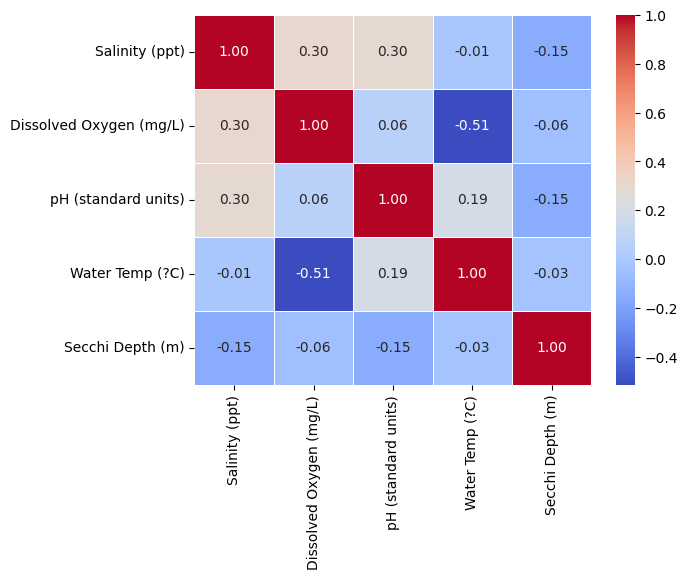

In [3]:

parameters = ['Salinity (ppt)', 'Dissolved Oxygen (mg/L)', 'pH (standard units)', 'Water Temp (?C)', 'Secchi Depth (m)']
correlation_matrix = df[parameters].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Water Quality Parameters')
plt.show()


This heatmap is one of the visual representation of the correlation coefficients between key water quality parameters. Heatmap can be very helpful in understanding these correlations. This also helps in identifying potential interactions between different environmental factors.

## 2. Time Series Decomposition of Water Temperature

To observe underlying trends and seasonal effects, it is helpful to decompose the water temperature data

<Week: weekday=6>


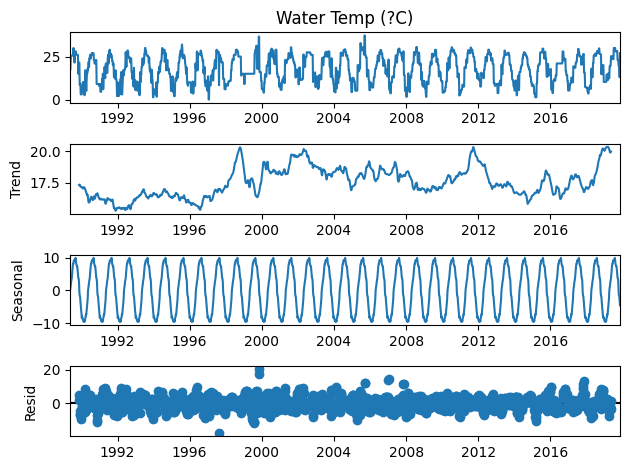

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv('BKB_WaterQualityData_2020084.csv')
df['Read_Date'] = pd.to_datetime(df['Read_Date'])
df.set_index('Read_Date', inplace=True)

df_weekly = df['Water Temp (?C)'].resample('W').mean().fillna(method='ffill')

df_weekly = df_weekly.asfreq('W')

print(df_weekly.index.freq)

if df_weekly.index.freq is not None:
    result = seasonal_decompose(df_weekly, model='additive')
    result.plot()
    plt.show()
else:
    print("Frequency not set. Decomposition cannot proceed.")



This plot represents a time series decomposition of water temperatures and it is broken down into three main components: trend, seasonal, and residual.
- The trend component indicates a warming trend that could have significant ecological impacts.
- The seasonal component reveals pronounced cyclic patterns that are expected in a natural water body.
- The residuals are stable so it might mean that the model has captured most of the variability in the data.

## 3.  Principal Component Analysis (PCA)

 Principal Component Analysis (PCA) plot is to visualize the multidimensional nature of the water quality dataset in a two-dimensional space. 

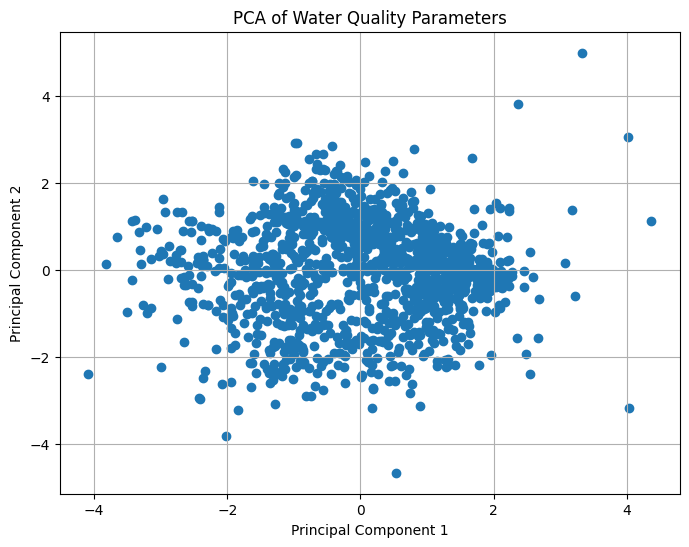

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('BKB_WaterQualityData_2020084.csv')

features = ['Salinity (ppt)', 'Dissolved Oxygen (mg/L)', 'pH (standard units)', 'Water Temp (?C)', 'Secchi Depth (m)']

x = df[features].dropna()
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

plt.figure(figsize=(8, 6))
plt.scatter(principalDf['Principal Component 1'], principalDf['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Water Quality Parameters')
plt.grid(True)
plt.show()


PCA is a technique used to emphasize variation and bring out strong patterns in a dataset. 
Using PCA allowed me to see the big picture of water quality data. It aids in discerning the underlying structure of the data.
